In [ ]:
# Megh Chavan
# J012

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.6 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import splitfolders
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
#import gradio as gr
%matplotlib inline

In [ ]:
# splitfolders.ratio('test_set', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [ ]:
!unzip /content/gdrive/MyDrive/DATA/Weather/output.zip

Archive:  /content/gdrive/MyDrive/DATA/Weather/output.zip
   creating: output/test/
   creating: output/test/Cloudy/
  inflating: output/test/Cloudy/cloudy107.jpg  
  inflating: output/test/Cloudy/cloudy129.jpg  
  inflating: output/test/Cloudy/cloudy149.jpg  
  inflating: output/test/Cloudy/cloudy153.jpg  
  inflating: output/test/Cloudy/cloudy175.jpg  
  inflating: output/test/Cloudy/cloudy178.jpg  
  inflating: output/test/Cloudy/cloudy191.jpg  
  inflating: output/test/Cloudy/cloudy193.jpg  
  inflating: output/test/Cloudy/cloudy212.jpg  
  inflating: output/test/Cloudy/cloudy220.jpg  
  inflating: output/test/Cloudy/cloudy240.jpg  
  inflating: output/test/Cloudy/cloudy242.jpg  
  inflating: output/test/Cloudy/cloudy243.jpg  
  inflating: output/test/Cloudy/cloudy252.jpg  
  inflating: output/test/Cloudy/cloudy26.jpg  
  inflating: output/test/Cloudy/cloudy261.jpg  
  inflating: output/test/Cloudy/cloudy265.jpg  
  inflating: output/test/Cloudy/cloudy267.jpg  
  inflating: output/

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("output/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['Cloudy' 'Rain' 'Shine' 'Sunrise']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (166, 249, 3)


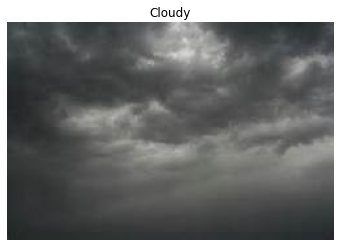

In [ ]:
img = view_random_image(target_dir = "output/train/",
                        target_class = "Cloudy")

Image shape: (1080, 1920, 3)


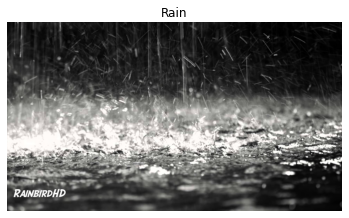

In [ ]:
img = view_random_image(target_dir = "output/train/",
                        target_class = "Rain")

Image shape: (151, 241, 3)


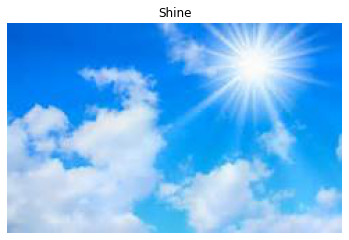

In [ ]:
img = view_random_image(target_dir = "output/train/",
                        target_class = "Shine")

Image shape: (1728, 2304, 3)


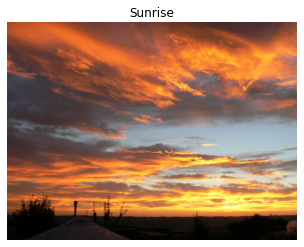

In [ ]:
img = view_random_image(target_dir = "output/train/",
                        target_class = "Sunrise")

In [ ]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(1728, 2304, 3)

In [ ]:
# Data Porocessing

In [ ]:
train_dir='output/train'
test_dir='output/test'
val_dir='output/val'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

Found 899 images belonging to 4 classes.
Found 115 images belonging to 4 classes.
Found 111 images belonging to 4 classes.


In [ ]:
# Creating n fitting the model

In [ ]:
# Inception

In [ ]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=3,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/3
29/29 [==============================] - 205s 7s/step - loss: 0.7234 - accuracy: 0.7586 - val_loss: 0.2469 - val_accuracy: 0.9062
Epoch 2/3
29/29 [==============================] - 201s 7s/step - loss: 0.2233 - accuracy: 0.9266 - val_loss: 0.2563 - val_accuracy: 0.9375
Epoch 3/3
29/29 [==============================] - 198s 7s/step - loss: 0.1287 - accuracy: 0.9577 - val_loss: 0.0281 - val_accuracy: 1.0000


In [ ]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model_0.evaluate(test_data)

4/4 [==============================] - 24s 6s/step - loss: 0.1640 - accuracy: 0.9391


[0.1640009880065918, 0.939130425453186]

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

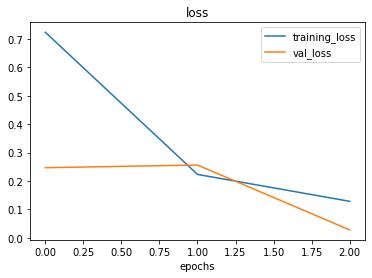

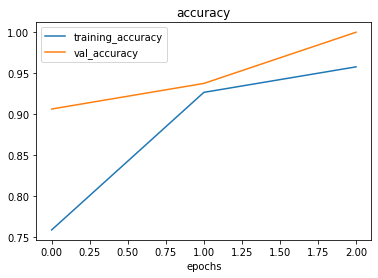

In [ ]:
plot_loss_curves(history)

In [ ]:
# predictions with inception

In [ ]:
# cReating a function that preprocess the custom data

def load_and_prep_image(filename, img_shape = 300):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

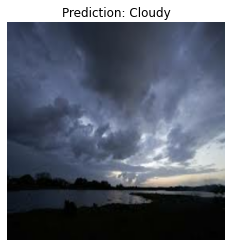

In [ ]:
pred_and_plot(model_0, "/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy1.jfif", class_names)

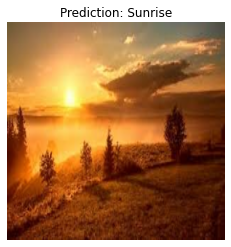

In [ ]:
pred_and_plot(model_0, "/content/gdrive/MyDrive/DATA/Weather/test_set/sunrise7.jfif", class_names)

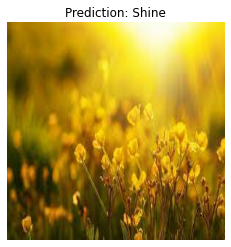

In [ ]:
pred_and_plot(model_0, "/content/gdrive/MyDrive/DATA/Weather/test_set/shine3.jfif", class_names)

In [ ]:
# predictions with xception

In [ ]:
# 1. Create a base model with tf.keras.applications

base_model1 = tf.keras.applications.xception.Xception(include_top= False,)

# 2. Freeze the base model
base_model1.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model1(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_1.fit(train_data,
                                 epochs=3,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

83697664/83683744 [==============================] - 1s 0us/step
Shape after passing inputs through base model: (None, 10, 10, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/3
29/29 [==============================] - 332s 11s/step - loss: 0.5474 - accuracy: 0.7875 - val_loss: 0.3143 - val_accuracy: 0.7812
Epoch 2/3
29/29 [==============================] - 339s 12s/step - loss: 0.2019 - accuracy: 0.9299 - val_loss: 0.5095 - val_accuracy: 0.9062
Epoch 3/3
29/29 [==============================] - 320s 11s/step - loss: 0.1254 - accuracy: 0.9633 - val_loss: 0.1871 - val_accuracy: 0.9375


In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model_1.evaluate(test_data)

4/4 [==============================] - 37s 9s/step - loss: 0.1767 - accuracy: 0.9478


[0.17666368186473846, 0.947826087474823]

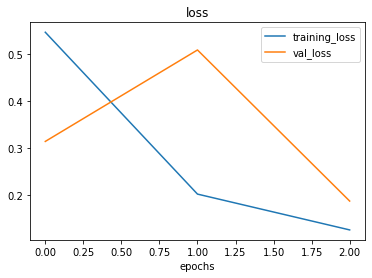

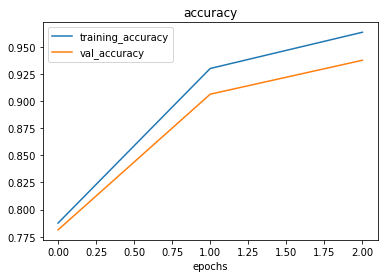

In [ ]:
plot_loss_curves(history)

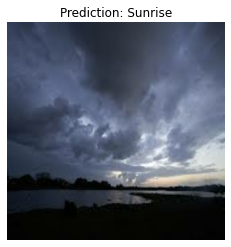

In [ ]:
pred_and_plot(model_1, "/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy1.jfif", class_names)

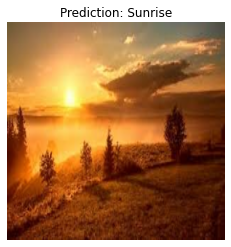

In [ ]:
pred_and_plot(model_1, "/content/gdrive/MyDrive/DATA/Weather/test_set/sunrise7.jfif", class_names)

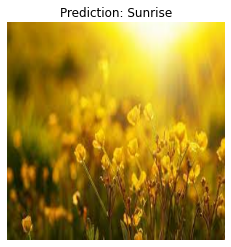

In [ ]:
pred_and_plot(model_1, "/content/gdrive/MyDrive/DATA/Weather/test_set/shine3.jfif", class_names)

In [ ]:
# Prediction with VGG16

In [ ]:
# 1. Create a base model with tf.keras.applications

base_model2 = tf.keras.applications.vgg16.VGG16(include_top= False,)

# 2. Freeze the base model
base_model2.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model2(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_2 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_2.fit(train_data,
                                 epochs=3,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

58900480/58889256 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 9, 9, 512)
Shape after GlobalAveragePooling2D: (None, 512)
Epoch 1/3
29/29 [==============================] - 861s 30s/step - loss: 1.1381 - accuracy: 0.5350 - val_loss: 0.7227 - val_accuracy: 0.8125
Epoch 2/3
29/29 [==============================] - 834s 29s/step - loss: 0.7067 - accuracy: 0.7753 - val_loss: 0.6225 - val_accuracy: 0.7500
Epoch 3/3
29/29 [==============================] - 846s 29s/step - loss: 0.5680 - accuracy: 0.8242 - val_loss: 0.5292 - val_accuracy: 0.8438


In [ ]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling_laye  (None, 512)              0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_2.evaluate(test_data)

4/4 [==============================] - 124s 27s/step - loss: 0.5627 - accuracy: 0.8174


[0.5627319812774658, 0.8173912763595581]

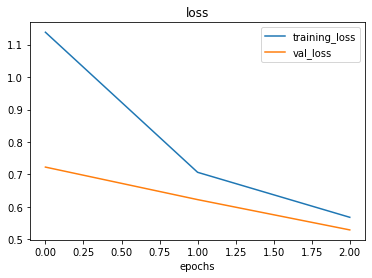

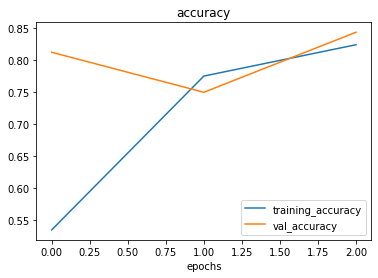

In [ ]:
plot_loss_curves(history)

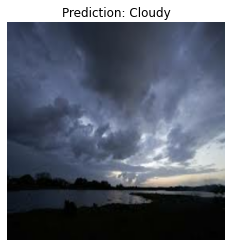

In [ ]:
pred_and_plot(model_2, "/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy1.jfif", class_names)

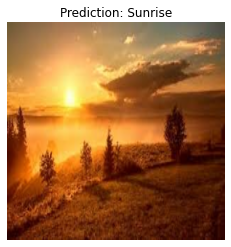

In [ ]:
pred_and_plot(model_2, "/content/gdrive/MyDrive/DATA/Weather/test_set/sunrise7.jfif", class_names)

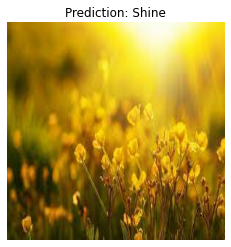

In [ ]:
pred_and_plot(model_2, "/content/gdrive/MyDrive/DATA/Weather/test_set/shine3.jfif", class_names)

In [ ]:
pred_s = []

In [ ]:
# import required module
import os
# assign directory
directory = '/content/gdrive/MyDrive/DATA/Weather/test_set'
path = [] 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        path.append(f)

In [ ]:
path

['/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy1.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy10.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy2.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy3.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy4.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy5.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy6.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy7.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy8.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/cloudy9.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy5.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy1.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy10.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy7.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy6.jfif',
 '/content/gdrive/MyDrive/DATA/Weather/test_set/rainy8.jfi

In [ ]:
for i in range (0,40):
  pred_s.append(pred_i(model_0, path[i] , class_names))


In [ ]:
def pred_i(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  return pred_class

In [ ]:
pred_s

['Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Cloudy',
 'Shine',
 'Cloudy',
 'Cloudy',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Rain',
 'Shine',
 'Rain',
 'Shine',
 'Shine',
 'Sunrise',
 'Rain',
 'Sunrise',
 'Rain',
 'Rain',
 'Shine',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise',
 'Sunrise']

In [ ]:
import pandas as pd
df = pd.DataFrame(pred_s)

In [ ]:
df.to_csv('pred_s.csv')